## Importação das Bibliotecas

In [222]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np
import sweetviz as sv

# Pacotes gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pacotes de modelagem
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

## Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Pacotes de calculo de desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Funções customizadas
import analise_dados

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

## Importação da base de dados

In [223]:
xlsx = pd.ExcelFile('../data/raw/base_de_dados_Inadimplencia.xlsx')
xlsx.sheet_names

['Metadados', 'Base']

### Metadados

Este dataframe fornece uma visão do significado dos dados que estão sendo analisados

In [224]:
pd.set_option('display.max_colwidth', None)

metadados = xlsx.parse('Metadados', skiprows=2, usecols=[1,2])
metadados.columns = ['Variavel', 'Descrição']
metadados

,Variavel,Descrição
0,Mês_Empréstimo,Mês em que o empréstimo foi concedido
1,ID_Cliente,Identificação do cliente
2,Idade,Idade do cliente
3,Profissão,Profissão do cliente
4,Salário,Salário do cliente (Renda Comprovada)
5,Taxa_Juros_Emprestimo,Taxa de Juros do Empréstimo concedido
6,Núm_Empréstimos,Número de empréstimos que o cliente já teve no mercado
7,Saldo_Devedor,Saldo devedor do empréstimo
8,Pagamento_Minimo_Cartao,Se cliente já pagou o mínimo de cartão de crédito alguma vez.
9,Inadimplencia,1 = Cliente deu inadimplência e 0 = Cliente pagou a divida sem atrasos


### Base

Este são os dados que serão analisados

In [225]:
df = xlsx.parse('Base')
df

,Mês_Empréstimo,ID_Cliente,Idade,Profissão,Salário,Taxa_Juros_Emprestimo,Núm_Empréstimos,Saldo_Devedor,Pagamento_Minimo_Cartao,Inadimplencia
0,1,23,28,Contador,1145.43,10,3,604.77,Não,0
1,1,32,18,Gerente de mídia,5842.50,12,1,203.56,Não,0
2,1,35,27,Engenheiro,3605.84,8,1,555.48,Não,0
3,1,48,22,Gerente,1467.71,5,0,728.06,Não,0
4,1,53,30,Cientista,12474.85,3,3,407.60,Não,0
...,...,...,...,...,...,...,...,...,...,...
3773,12,3757,37,Professora,2169.40,6,1,1147.59,Não,0
3774,12,3765,38,Empreendedor,5028.93,5,4,1307.67,Não,0
3775,12,3771,32,Escritor,1075.47,10,3,1367.75,Sim,0
3776,12,3773,28,Engenheiro,4881.51,24,8,2829.78,Sim,1


## Preparação dos Dados

### Informações

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mês_Empréstimo           3778 non-null   int64  
 1   ID_Cliente               3778 non-null   int64  
 2   Idade                    3778 non-null   int64  
 3   Profissão                3778 non-null   object 
 4   Salário                  3778 non-null   float64
 5   Taxa_Juros_Emprestimo    3778 non-null   int64  
 6   Núm_Empréstimos          3778 non-null   int64  
 7   Saldo_Devedor            3778 non-null   float64
 8   Pagamento_Minimo_Cartao  3778 non-null   object 
 9   Inadimplencia            3778 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 295.3+ KB


In [227]:
df['Mês_Empréstimo'] = pd.to_datetime(df['Mês_Empréstimo'], format='%m')
df['Mês_Empréstimo'] = df['Mês_Empréstimo'].dt.month_name(locale='pt_BR.utf8')

### Missing Values

In [228]:
df.isnull().sum()

Mês_Empréstimo             0
ID_Cliente                 0
Idade                      0
Profissão                  0
Salário                    0
Taxa_Juros_Emprestimo      0
Núm_Empréstimos            0
Saldo_Devedor              0
Pagamento_Minimo_Cartao    0
Inadimplencia              0
dtype: int64

### Duplicatas

In [229]:
df.duplicated().sum()

0

É possivel notar que:

- Há 3778 registros (ou linhas)
- Há 10 features (ou variáveis)
- Não há valores faltantes ou duplicados

## Análise Exploratoria dos Dados

In [230]:
df.head()

,Mês_Empréstimo,ID_Cliente,Idade,Profissão,Salário,Taxa_Juros_Emprestimo,Núm_Empréstimos,Saldo_Devedor,Pagamento_Minimo_Cartao,Inadimplencia
0,Janeiro,23,28,Contador,1145.43,10,3,604.77,Não,0
1,Janeiro,32,18,Gerente de mídia,5842.50,12,1,203.56,Não,0
2,Janeiro,35,27,Engenheiro,3605.84,8,1,555.48,Não,0
3,Janeiro,48,22,Gerente,1467.71,5,0,728.06,Não,0
4,Janeiro,53,30,Cientista,12474.85,3,3,407.60,Não,0


### Relatório

In [231]:
sv_report = sv.analyze(df, 'Inadimplencia')
sv_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Observações

[Relatório](notebooks/SWEETVIZ_REPORT.html)

- **Inadimplencia**
    - Variável Target
    - Desbalanceada: 10% da base ficou inadimplente

- **Mês_Empréstimo**
    - O mês com a maior quantidade de emprestimo foi abril.
    - O mês com a menor quantidade de emprestimo foi janeiro.

- **ID_Cliente**
    - Variável identificadora

- **Idade**
    - 50% dos clientes tinham idade entre 26 e 44 anos.

- **Profissão**
    - A base é bem distribuida entre as profissões

- **Salário**
    - 50% dos clientes recebem um salário entre $2.001,00 a $7.343,00

- **Taxa_Juros_Emprestimo**
    - 50% dos clientes tem uma taxa de até 8%, mas há aproximadamente 25% que tem uma taxa de mais de 12%

- **Núm_Empréstimos**    
    - A grande maioria dos clientes recorreram a um emprestimo pelo menos 4 vezes

- **Saldo_Devedor**
    - 50% dos clientes devem até $810,00
    - 75% dos clientes devem até $1.264,00
    - A clientes que devem até $4.998

- **Pagamento_Minimo_Cartao**
    - 76% dos clientes não optaram por usar o pagamento minimo do cartão.

## Análise Bivariada

### Correlação de Pearson

<Axes: >

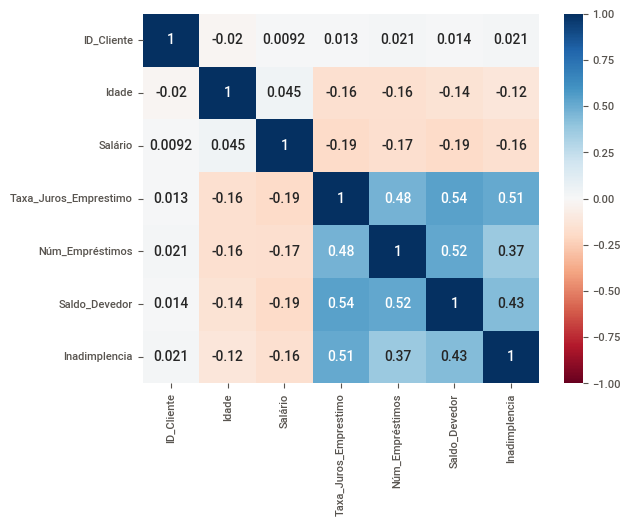

In [232]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', vmax=1, vmin=-1, center=0)

A partir da correlação de Pearson podemos notar que há uma ligação positiva moderada entre as features respostas `Saldo_Devedor`, `Núm_Empréstimos`, `Taxa_Juros_Emprestimo`.

### Gráfico de dispersão

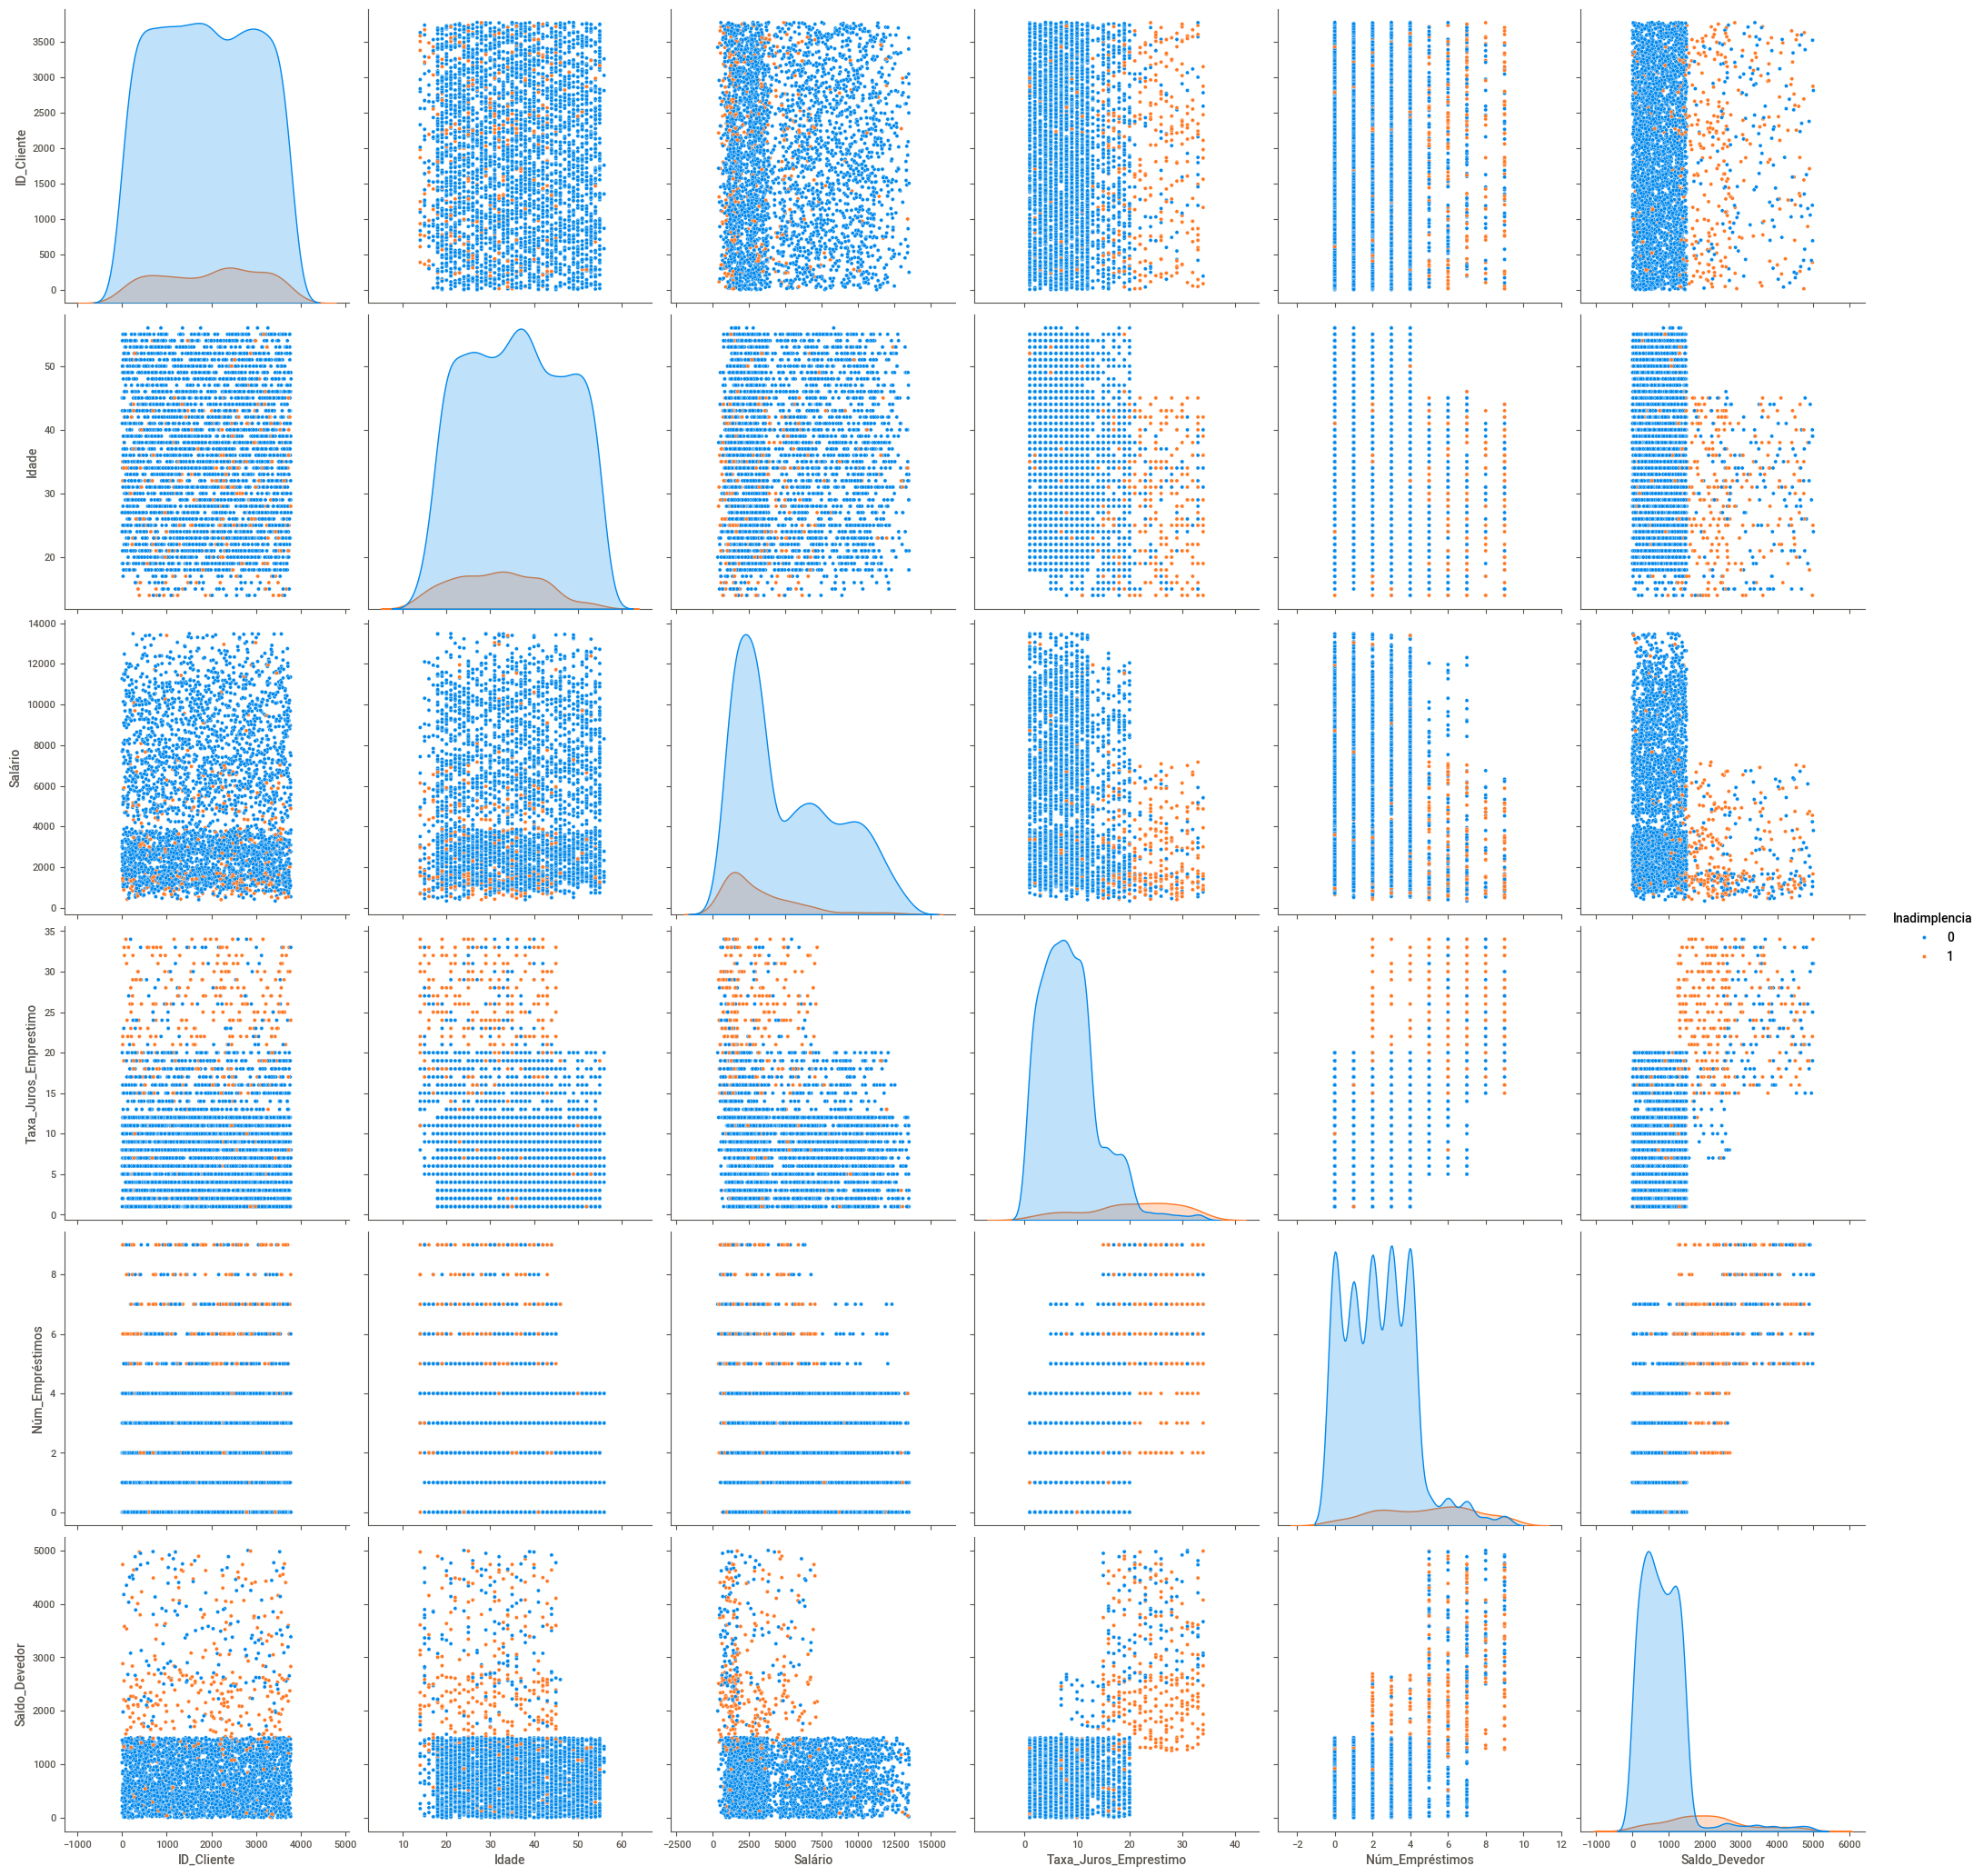

In [233]:
# matriz de gráficos scatter 
sns.pairplot(df, hue='Inadimplencia', height=3.5)

Já é possível identificar pelos gráficos uma relação entre as variáveis. Abaixo, irei utilizar o Information Value para confirmar essa relação com a variável target `Inadimplencia`.

### Information Value

A técnica de Information Value (IV) nos fornece o "poder de separação" que uma variável qualitativa de duas ou mais categorias possui sobre outra variável binária.

| IV Total   | Poder de separação                      |
| ---------- | --------------------------------------- |
| < 0,02     | Muito fraco                             |
| 0,02 a 0,1 | Fraco                                   |
| 0,1 a 0,3  | Médio                                   |
| 0,3 a 0,5  | Forte                                   |
| > 0,5      | Comportamento suspeito                  |

In [234]:
iv = analise_dados.analise_iv(df, 'Inadimplencia')
iv.get_lista_iv()

Inadimplencia,IV
Variavel,
Taxa_Juros_Emprestimo,2.33
Saldo_Devedor,2.24
Núm_Empréstimos,1.55
Pagamento_Minimo_Cartao,1.25
Salário,0.53
Idade,0.32
Profissão,0.04
ID_Cliente,0.01
Mês_Empréstimo,0.00


Obtivemos categorias que possuem um alto poder de separação, o que será muito útil em nosso modelo de previsão.

#### Função auxiliar

In [235]:
def plot_density(col):
    fig, ax0 = plt.subplots(figsize=(14,6))

    sns.kdeplot(df[df['Inadimplencia'] == 0][col], shade=True, label='Inadimplencia = 0')
    sns.kdeplot(df[df['Inadimplencia'] == 1][col], shade=True, label='Inadimplencia = 1', color='r')
    ax0.set_title(f'Distribuição de {col} por categoria de Inadimplencia')
    ax0.legend()

    sns.despine()
    plt.show()

#### `Taxa_Juros_Emprestimo`

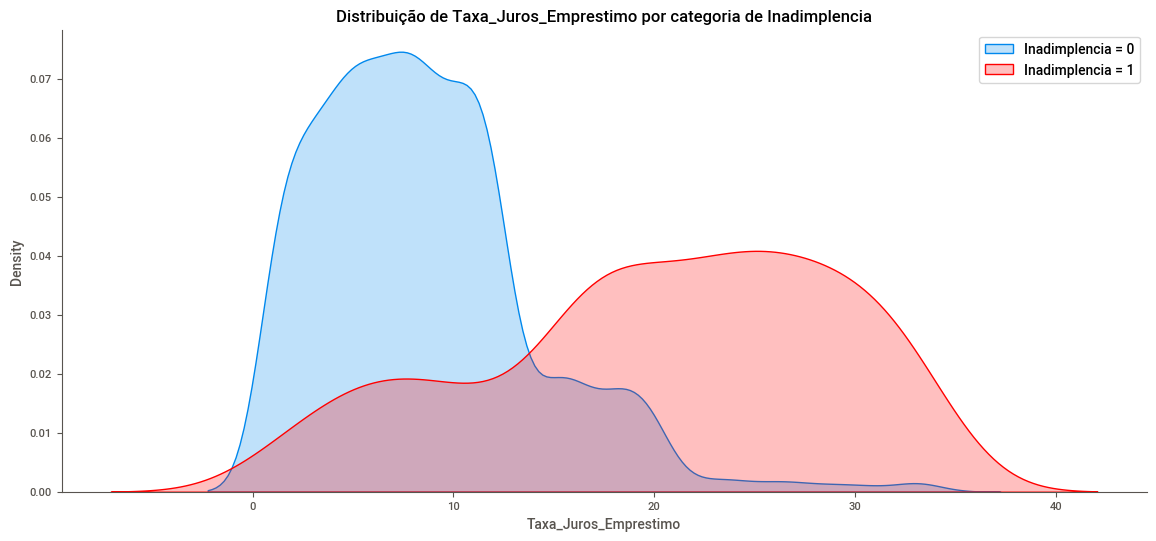

In [236]:
plot_density('Taxa_Juros_Emprestimo')

In [237]:
iv.get_bivariada('Taxa_Juros_Emprestimo')

==> "Taxa_Juros_Emprestimo" tem IV de 2.33


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Taxa_Juros_Emprestimo,"(0.99, 2.0]",10,406,416,11.01,2.65,11.94,2.40,0.22,-1.51,0.14
1,Taxa_Juros_Emprestimo,"(2.0, 4.0]",9,441,450,11.91,2.39,12.97,2.00,0.18,-1.71,0.18
2,Taxa_Juros_Emprestimo,"(4.0, 5.0]",11,261,272,7.20,2.92,7.67,4.04,0.38,-0.97,0.05
3,Taxa_Juros_Emprestimo,"(5.0, 7.0]",16,494,510,13.50,4.24,14.53,3.14,0.29,-1.24,0.13
4,Taxa_Juros_Emprestimo,"(7.0, 8.0]",8,274,282,7.46,2.12,8.06,2.84,0.26,-1.35,0.08
5,Taxa_Juros_Emprestimo,"(8.0, 10.0]",14,457,471,12.47,3.71,13.44,2.97,0.28,-1.27,0.12
6,Taxa_Juros_Emprestimo,"(10.0, 11.0]",8,248,256,6.78,2.12,7.29,3.12,0.29,-1.24,0.06
7,Taxa_Juros_Emprestimo,"(11.0, 14.0]",10,361,371,9.82,2.65,10.61,2.70,0.25,-1.39,0.11
8,Taxa_Juros_Emprestimo,"(14.0, 19.0]",80,323,403,10.67,21.22,9.50,19.85,2.23,0.80,0.09
9,Taxa_Juros_Emprestimo,"(19.0, 34.0]",211,136,347,9.18,55.97,4.00,60.81,13.99,2.64,1.37


- Os clientes com uma taxa de juros maior que 14% mostram um risco maior em inâdimplir

#### `Saldo_Devedor`

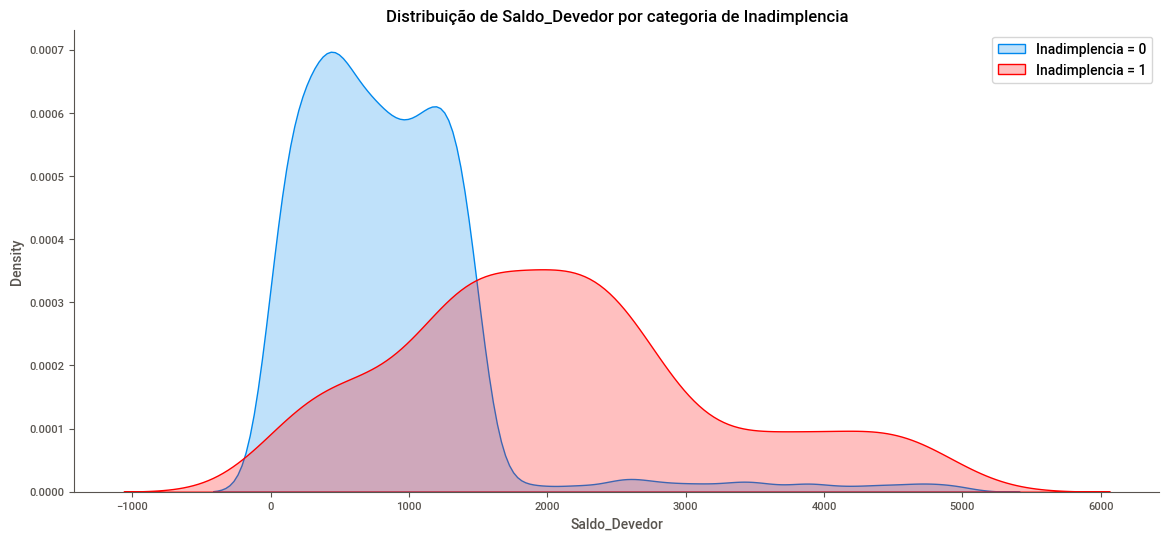

In [238]:
plot_density('Saldo_Devedor')

In [239]:
iv.get_bivariada('Saldo_Devedor')

==> "Saldo_Devedor" tem IV de 2.24


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Devedor,"(0.22, 166.42]",10,368,378,10.01,2.65,10.82,2.65,0.24,-1.43,0.12
1,Saldo_Devedor,"(166.42, 334.65]",14,364,378,10.01,3.71,10.70,3.70,0.35,-1.05,0.07
2,Saldo_Devedor,"(334.65, 475.79]",8,370,378,10.01,2.12,10.88,2.12,0.19,-1.66,0.15
3,Saldo_Devedor,"(475.79, 640.06]",13,364,377,9.98,3.45,10.70,3.45,0.32,-1.14,0.08
4,Saldo_Devedor,"(640.06, 809.96]",10,368,378,10.01,2.65,10.82,2.65,0.24,-1.43,0.12
5,Saldo_Devedor,"(809.96, 1002.34]",14,364,378,10.01,3.71,10.70,3.70,0.35,-1.05,0.07
6,Saldo_Devedor,"(1002.34, 1181.42]",9,368,377,9.98,2.39,10.82,2.39,0.22,-1.51,0.13
7,Saldo_Devedor,"(1181.42, 1340.85]",25,353,378,10.01,6.63,10.38,6.61,0.64,-0.45,0.02
8,Saldo_Devedor,"(1340.85, 1643.92]",45,333,378,10.01,11.94,9.79,11.90,1.22,0.20,0.00
9,Saldo_Devedor,"(1643.92, 4998.07]",229,149,378,10.01,60.74,4.38,60.58,13.87,2.63,1.48


- Os clientes que possuem um saldo de emprestimo maior que $1340,85 mostram um risco maior em inâdimplir

#### `Núm_Empréstimos`

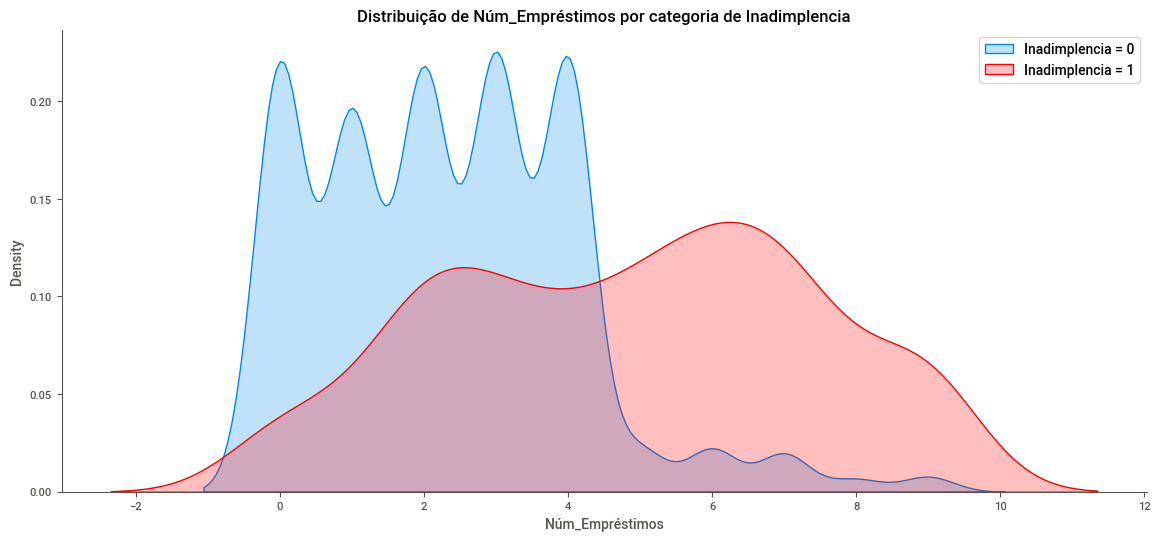

In [240]:
plot_density('Núm_Empréstimos')

In [241]:
iv.get_bivariada('Núm_Empréstimos')

==> "Núm_Empréstimos" tem IV de 1.55


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Núm_Empréstimos,"(-0.01, 1.0]",35,1223,1258,33.30,9.28,35.96,2.78,0.26,-1.35,0.36
1,Núm_Empréstimos,"(1.0, 2.0]",52,635,687,18.18,13.79,18.67,7.57,0.74,-0.30,0.01
2,Núm_Empréstimos,"(2.0, 3.0]",42,656,698,18.48,11.14,19.29,6.02,0.58,-0.54,0.04
3,Núm_Empréstimos,"(3.0, 4.0]",35,659,694,18.37,9.28,19.38,5.04,0.48,-0.73,0.07
4,Núm_Empréstimos,"(4.0, 5.0]",44,63,107,2.83,11.67,1.85,41.12,6.31,1.84,0.18
5,Núm_Empréstimos,"(5.0, 9.0]",169,165,334,8.84,44.83,4.85,50.60,9.24,2.22,0.89


- Os clientes com uma quantidade superior a 4 empréstimos no mercado mostram um risco maior em inâdimplir

#### `Pagamento_Minimo_Cartao`

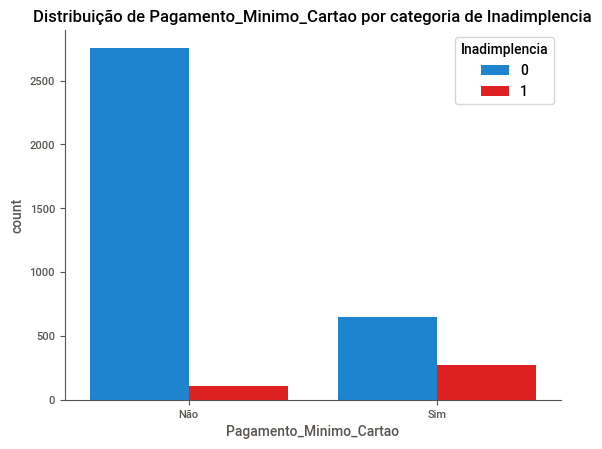

In [242]:
sns.countplot(df, x='Pagamento_Minimo_Cartao', hue='Inadimplencia', palette=['C0', 'r'])
plt.title(f'Distribuição de Pagamento_Minimo_Cartao por categoria de Inadimplencia')

sns.despine()
plt.show()

In [243]:
iv.get_bivariada('Pagamento_Minimo_Cartao')

==> "Pagamento_Minimo_Cartao" tem IV de 1.25


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Pagamento_Minimo_Cartao,Não,108,2757,2865,75.83,28.65,81.06,3.77,0.35,-1.05,0.55
1,Pagamento_Minimo_Cartao,Sim,269,644,913,24.17,71.35,18.94,29.46,3.77,1.33,0.70


- Os clientes que já pagaram o mínimo do cartão de crédito pelo menos uma vez mostram um risco maior em inâdimplir

#### `Salário`

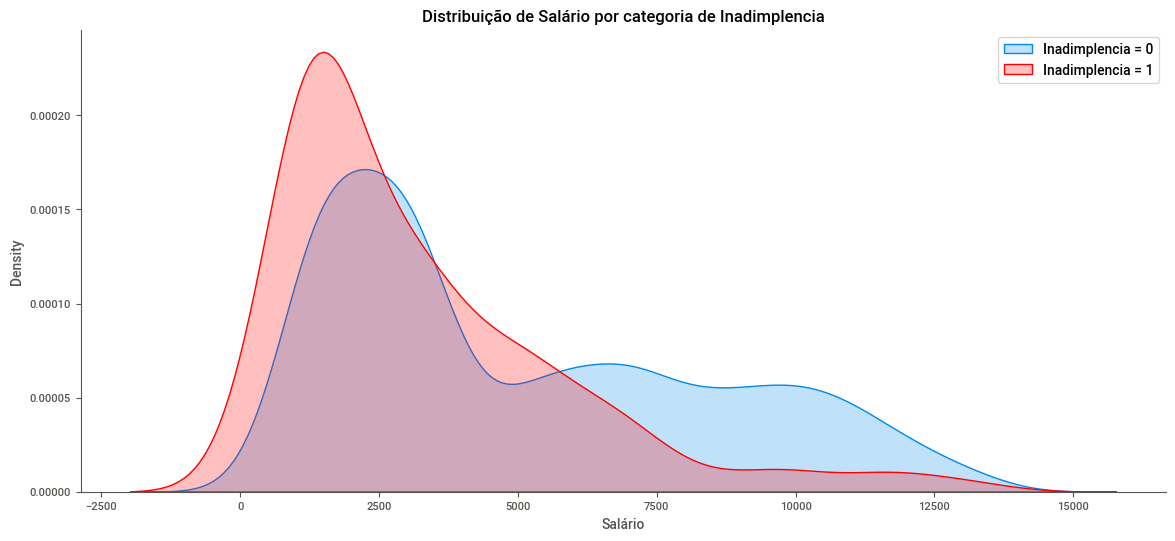

In [244]:
plot_density('Salário')

In [245]:
iv.get_bivariada('Salário')

==> "Salário" tem IV de 0.53


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Salário,"(332.12, 1303.31]",77,301,378,10.01,20.42,8.85,20.37,2.31,0.84,0.10
1,Salário,"(1303.31, 1724.03]",80,298,378,10.01,21.22,8.76,21.16,2.42,0.88,0.11
2,Salário,"(1724.03, 2391.97]",32,346,378,10.01,8.49,10.17,8.47,0.83,-0.19,0.00
3,Salário,"(2391.97, 2913.16]",23,354,377,9.98,6.10,10.41,6.10,0.59,-0.53,0.02
4,Salário,"(2913.16, 3516.5]",40,338,378,10.01,10.61,9.94,10.58,1.07,0.07,0.00
5,Salário,"(3516.5, 5101.3]",53,325,378,10.01,14.06,9.56,14.02,1.47,0.39,0.02
6,Salário,"(5101.3, 6646.88]",33,344,377,9.98,8.75,10.11,8.75,0.87,-0.14,0.00
7,Salário,"(6646.88, 8320.55]",19,359,378,10.01,5.04,10.56,5.03,0.48,-0.73,0.04
8,Salário,"(8320.55, 10231.89]",8,370,378,10.01,2.12,10.88,2.12,0.19,-1.66,0.15
9,Salário,"(10231.89, 13485.46]",12,366,378,10.01,3.18,10.76,3.17,0.30,-1.20,0.09


- Os clientes que recebem um salário menor mostram um risco maior em inâdimplir

#### `Idade`

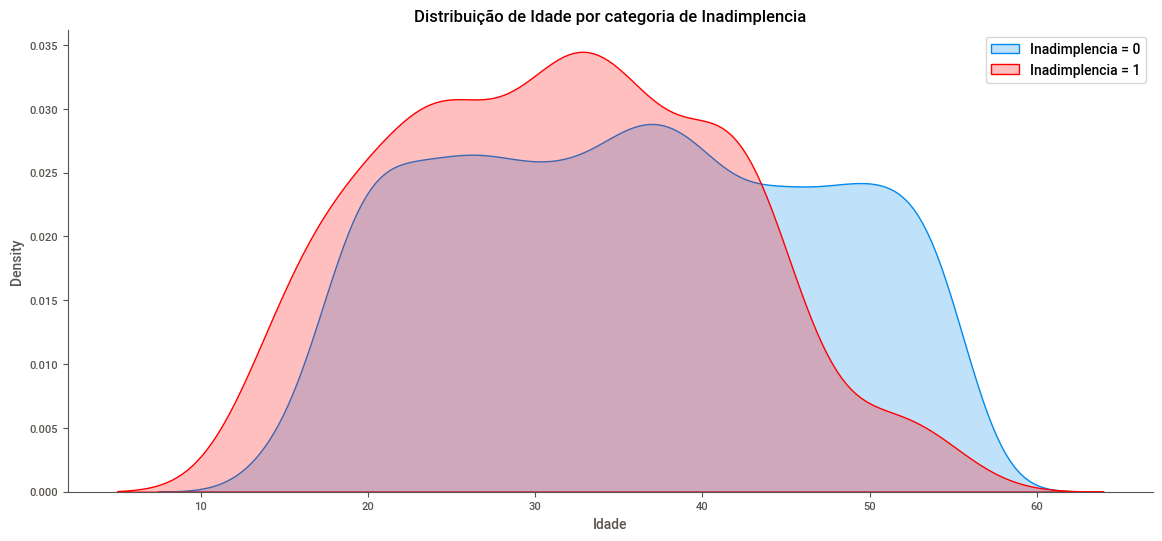

In [246]:
plot_density('Idade')

In [247]:
iv.get_bivariada('Idade')

==> "Idade" tem IV de 0.32


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Idade,"(13.99, 20.0]",60,332,392,10.38,15.92,9.76,15.31,1.63,0.49,0.03
1,Idade,"(20.0, 24.0]",45,349,394,10.43,11.94,10.26,11.42,1.16,0.15,0.00
2,Idade,"(24.0, 28.0]",45,370,415,10.98,11.94,10.88,10.84,1.10,0.10,0.00
3,Idade,"(28.0, 32.0]",55,343,398,10.53,14.59,10.09,13.82,1.45,0.37,0.02
4,Idade,"(32.0, 35.0]",41,278,319,8.44,10.88,8.17,12.85,1.33,0.29,0.01
5,Idade,"(35.0, 39.0]",38,401,439,11.62,10.08,11.79,8.66,0.85,-0.16,0.00
6,Idade,"(39.0, 42.0]",38,255,293,7.76,10.08,7.50,12.97,1.34,0.29,0.01
7,Idade,"(42.0, 46.6]",36,336,372,9.85,9.55,9.88,9.68,0.97,-0.03,0.00
8,Idade,"(46.6, 51.0]",9,399,408,10.80,2.39,11.73,2.21,0.20,-1.61,0.15
9,Idade,"(51.0, 56.0]",10,338,348,9.21,2.65,9.94,2.87,0.27,-1.31,0.10


- Os clientes mais jovens, até 35 anos, mostram um risco maior em inâdimplir

## Divisão do Conjunto de Dados

Antes de realizar o pré-processamento dos dados, irei separar o conjunto de teste que validará a eficacia do modelo.

Irei retirar das features independentes as variáveis `ID_Cliente`, `Mês_Emprestimo` e `Profissão` que se mostraram pouco preditivas em relação a nossa target.

In [248]:
x = df.drop(['Inadimplencia', 'ID_Cliente', 'Mês_Empréstimo', 'Profissão'], axis=1)
x = pd.get_dummies(x, drop_first=True, dtype=int)
y = df['Inadimplencia']

print(f'Features response -> {list(x.columns)}')
print(f'Feature target -> {y.name}')

Features response -> ['Idade', 'Salário', 'Taxa_Juros_Emprestimo', 'Núm_Empréstimos', 'Saldo_Devedor', 'Pagamento_Minimo_Cartao_Sim']
Feature target -> Inadimplencia


In [249]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

print(f'Tamanho do target de treino: {y_train.shape[0]} linhas')
print(f'Tamanho do target de teste: {y_test.shape[0]} linhas')

Tamanho do target de treino: 3022 linhas
Tamanho do target de teste: 756 linhas


## Pré-processamento

### Considerações

- Nenhuma das colunas inseridas no modelo poderão causar data leakage

In [250]:
def pipeline(model):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    return pipe

## Treinamento dos modelos de Machine Learning

#### Maximizando o roc_auc

Logistic Regression: 0.8651, 0.0267
LinearSVC: 0.8669, 0.0261
Stochastic GD: 0.8574, 0.0333
Decision Tree: 0.7421, 0.0107
Balanced RF: 0.8562, 0.0207
Gradient Boost: 0.8646, 0.0297


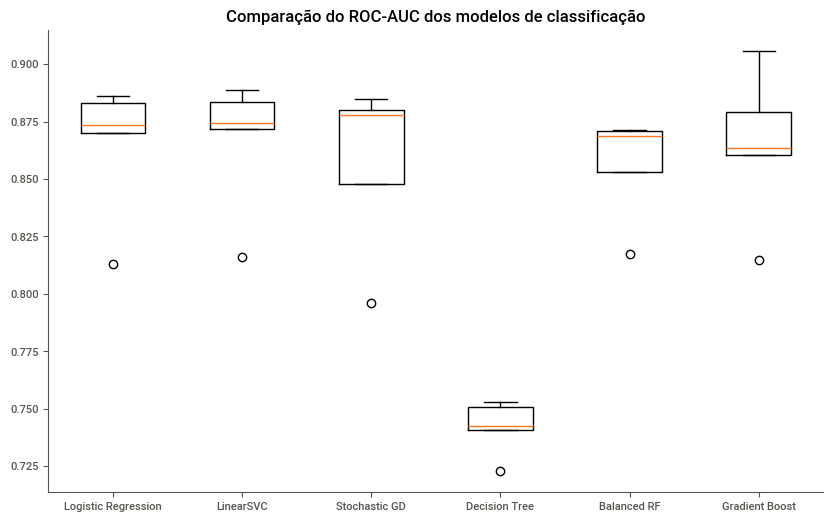

In [251]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
svc = LinearSVC(class_weight='balanced', random_state=42)
sgdc = SGDClassifier(class_weight='balanced', random_state=42)
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)
brfc = BalancedRandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

models = [log_reg, svc, sgdc, dtc, brfc, gbc]
model_names = ['Logistic Regression', 'LinearSVC', 'Stochastic GD', 'Decision Tree', 'Balanced RF', 'Gradient Boost']

results = []

for model in models:
    pipe = pipeline(model)
    cv_results = cross_val_score(pipe, x_train, y_train, cv=5, scoring='roc_auc')
    results.append(cv_results)
    msg = f'{model_names[models.index(model)]}: {cv_results.mean().round(4)}, {cv_results.std().round(4)}'
    print(msg)

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.title('Comparação do ROC-AUC dos modelos de classificação')

sns.despine()

Dos modelos testados, o `Decision Tree` foi o que obteve o menor desempenho. O `LinearSVC` e `Logistic Regression` obtiveram os melhores resultados de ROC_AUC e menores variações. Irei optar pelo `LinearSVC` por sua leve vantagem em média e desvio padrão.

### Ajuste dos hiperparâmetros

In [252]:
svc = LinearSVC(class_weight='balanced', random_state=42)
pipe = pipeline(svc)

param_dist = {
    'classifier__C': np.logspace(-3, 3, 100),  # C variando em escala logarítmica
    'classifier__loss': ['hinge', 'squared_hinge'],
    'classifier__max_iter': [1000, 5000, 10000]
}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    random_search = RandomizedSearchCV(pipe, param_dist, cv=5, scoring='roc_auc', n_jobs=-1, n_iter=1000)
    random_search.fit(x_train, y_train)

print(f"Best parameter (CV score={random_search.best_score_.round(4)}):")
print(random_search.best_params_)

/home/matheus/projetos/risco_de_credito/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/matheus/projetos/risco_de_credito/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/matheus/projetos/risco_de_credito/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/matheus/projetos/risco_de_credito/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/matheus/projetos/risco_de_credito/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Best parameter (CV score=0.8718):
{'classifier__max_iter': 1000, 'classifier__loss': 'hinge', 'classifier__C': 46.41588833612782}


/home/matheus/projetos/risco_de_credito/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Análise das Métricas

In [253]:
model = random_search.best_estimator_
model.fit(x_train, y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)
decision_score_train = model.decision_function(x_train)
decision_score_test = model.decision_function(x_test)

roc_train = roc_auc_score(y_train, decision_score_train)
roc_test = roc_auc_score(y_test, decision_score_test)

acc_train = accuracy_score(y_train, ypred_train)
acc_test = accuracy_score(y_test, ypred_test)
    
prec_train = precision_score(y_train, ypred_train, zero_division=0)
prec_test = precision_score(y_test, ypred_test, zero_division=0)

recl_train = recall_score(y_train, ypred_train)
recl_test = recall_score(y_test, ypred_test)

f1_train = f1_score(y_train, ypred_train)
f1_test = f1_score(y_test, ypred_test)

df_desemp = pd.DataFrame({'Treino':[roc_train, acc_train, prec_train, recl_train, f1_train],
                            'Teste':[roc_test, acc_test, prec_test, recl_test, f1_test]},
                        index=['ROC-AUC', 'Acurácia', 'Precision','Recall','F1'])

df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)

df_desemp

,Treino,Teste,Variação
ROC-AUC,0.869497,0.831331,-0.04
Acurácia,0.933819,0.914021,-0.02
Precision,0.639535,0.581633,-0.09
Recall,0.743243,0.703704,-0.05
F1,0.687500,0.636872,-0.07


#### Features mais importantes

In [254]:
coef = model.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'Features': x.columns,
    'Coef': abs(coef)
})

coef_df.sort_values('Coef', ascending=False).reset_index(drop=True)

,Features,Coef
0,Taxa_Juros_Emprestimo,0.411302
1,Saldo_Devedor,0.246581
2,Salário,0.123478
3,Pagamento_Minimo_Cartao_Sim,0.108576
4,Núm_Empréstimos,0.045543
5,Idade,0.014022


As features mais relevantes são `Taxa_Juros_Emprestimo`, `Saldo_Devedor` e `Salário`.

## Análise financeira

Com o modelo preditivo criado, podemos criar uma estratégia individualizada de aconselhamento para que os clientes com alto risco de inadimplência sejam encorajados a pagar sua dívida a tempo ou oferecer opções de pagamento se isso não for possível. O custo por aconselhamento é de R$ 200,00 e a taxa de sucesso esperada é de 70%.

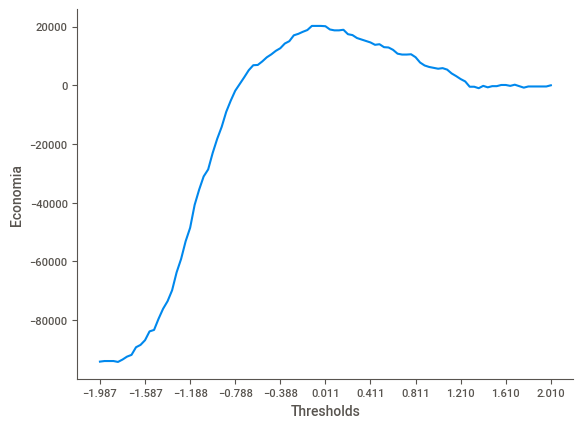

In [255]:
custo_por_aconselhamento = 200
efetividade = 0.70
score_min = decision_score_test.min()
score_max = decision_score_test.max()
contador = 0
thresholds = np.linspace(score_min, score_max, 101)
saldo_medio = x_test['Saldo_Devedor'].mean()

n_pos_pred = np.empty_like(thresholds)
custo_aconselhamento_total = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
economia_por_conselho = np.empty_like(thresholds)

for threshold in thresholds:
    pos_pred = decision_score_test>threshold
    n_pos_pred[contador] = sum(pos_pred)
    custo_aconselhamento_total[contador] = n_pos_pred[contador] * custo_por_aconselhamento
    true_pos = pos_pred & y_test.astype(bool)
    n_true_pos[contador] = sum(true_pos)
    economia_por_conselho[contador] = n_true_pos[contador] * saldo_medio * efetividade
    contador += 1

economia_liquida = economia_por_conselho - custo_aconselhamento_total

plt.plot(thresholds, economia_liquida)
plt.xlabel('Thresholds')
plt.ylabel('Economia')
plt.xticks(np.linspace(score_min, score_max, 11))
sns.despine();

A plotagem indica que a escolha do threshold é importante

In [256]:
maior_economia_ix = np.argmax(economia_liquida)
best_threshold = thresholds[maior_economia_ix]
best_savings = economia_liquida[maior_economia_ix]

print(f'A maior economia de R${best_savings:.2f} é alcançada no limite de {best_threshold:.4f}')


A maior economia de R$20224.24 é alcançada o limite de -0.1086


In [257]:
custo_por_inadimplencia = sum(y_test) * saldo_medio
print(f'O custo total de todas as inadimplências seria de R${custo_por_inadimplencia:.2f}.')
print(f'Percentual diminuido pelo programa de aconselhamento {round(best_savings/custo_por_inadimplencia*100,2)}%.')

O custo total de todas as inadimplências seria de R$81252.21.
Percentual diminuido pelo programa de aconselhamento 24.89%.


## Conclusão Geral

Após uma análise profunda das métricas de desempenho e das análises financeiras, os seguintes pontos foram observados:

1. **Métricas de Desempenho**
    - O **Modelo Treinado** apresentou:
        - **ROC-AUC** de 0.87, sugerindo um boa capacidade de discriminação
        - **Precisão** de 0.63, indicando que, dos clientes previstos como inadimplentes, o modelo acertou 63%
        - **Recall** de 0.74, indicando que, dos clientes que inadimpliram, o modelo conseguiu captar 74%
        - **F1-score**, uma métrica que combina precisão e recall, o modelo obteve um score de 0.68.

2. **Performance Financeira**
    - Com base em uma estratégia de aconselhamento, modelo treinado obteve uma economia de quase 25% em nosso dataset de teste, economizando R$20.224,24 no saldo médio utilizando um threshold de -0.1086.

A implementação de um modelo de Machine Learning contribui na detecção e prevenção de inadimplência, além de trazer um potencial ganho financeiro.